### Impoterd all required Packages

In [ ]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import tensorflow_data_validation as tfdv
import apache_beam as beam
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore,chi2_contingency,chi2
from pandas_profiling import ProfileReport
from tensorflow import keras

### Importing Data Using Pandas

In [2]:
df_jan = pd.read_parquet('Project1_intro_to_deep_Learnign/jan.parquet',engine = 'fastparquet')
df_jan.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4         2  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          6.0    3.0      0.5        1.47           0.0   
1             1          7.0    3.0      0.5        1.50           0.0   
2             1          6.0    3.0      0.5        1.00           0.0   
3             1          5.5    0.5      0.5        1.36           0.0   
4             2          3.5    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    0.3         11.27                   2.5          NaN  
1                    0.3         12.30                   2.5          NaN  
2                    0.3         10.80                   2.5          NaN  
3                    0.3          8.16                   0.0          NaN  
4                    0.3          4.80                   0.0          NaN

In [3]:
df_jan.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6405003         2  2020-01-31 23:08:00   2020-01-31 23:34:00              NaN   
6405004         2  2020-01-31 23:00:00   2020-01-31 23:44:00              NaN   
6405005         2  2020-01-31 23:13:00   2020-01-31 23:38:00              NaN   
6405006         2  2020-01-31 23:02:54   2020-01-31 23:27:10              NaN   
6405007         2  2020-01-31 23:56:37   2020-02-01 00:16:35              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
6405003          12.07         NaN               None           191   
6405004          23.48         NaN               None           186   
6405005          12.09         NaN               None           164   
6405006          11.65         NaN               None            10   
6405007           8.54         NaN               None           247   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
6405003            35             0        52.18   2.75      0.5         0.0   
6405004           117             0        54.01   2.75      0.5         0.0   
6405005           131             0        38.02   2.75      0.5         0.0   
6405006            16             0        28.74   2.75      0.0         0.0   
6405007            81             0        31.31   2.75      0.0         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
6405003          0.00                    0.3         55.73   
6405004          6.12                    0.3         63.68   
6405005          6.12                    0.3         47.69   
6405006          0.00                    0.3         31.79   
6405007          0.00                    0.3         34.36   

         congestion_surcharge  airport_fee  
6405003                   NaN          NaN  
6405004                   NaN          NaN  
6405005                   NaN          NaN  
6405006                   NaN          NaN  
6405007                   NaN          NaN

### Droppoing the Columns Airport_Fee

In [4]:
df_jan = df_jan.drop(columns=['airport_fee'])

### Dropping Null Values

In [5]:
df_jan = df_jan.dropna()
df_jan.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [6]:
df_jan.shape

(6339567, 18)

# PREPROCESSING THE DATA

In [7]:
df_jan['Total_ride_time'] = df_jan['tpep_dropoff_datetime']-df_jan['tpep_pickup_datetime']

In [8]:
df_jan.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4         2  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          6.0    3.0      0.5        1.47           0.0   
1             1          7.0    3.0      0.5        1.50           0.0   
2             1          6.0    3.0      0.5        1.00           0.0   
3             1          5.5    0.5      0.5        1.36           0.0   
4             2          3.5    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge Total_ride_time  
0                    0.3         11.27                   2.5 0 days 00:04:48  
1                    0.3         12.30                   2.5 0 days 00:07:25  
2                    0.3         10.80                   2.5 0 days 00:06:11  
3                    0.3          8.16                   0.0 0 days 00:04:51  
4                    0.3          4.80                   0.0 0 days 00:02:18

### Converting time frame into Seconds

In [9]:
def sec(t):
    con_str = pd.Timedelta(t)
    return con_str.seconds

In [10]:
df_jan['Ride_Time_Sec'] = df_jan['Total_ride_time'].apply(sec)

In [11]:
df_jan.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4         2  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          6.0    3.0      0.5        1.47           0.0   
1             1          7.0    3.0      0.5        1.50           0.0   
2             1          6.0    3.0      0.5        1.00           0.0   
3             1          5.5    0.5      0.5        1.36           0.0   
4             2          3.5    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge Total_ride_time  \
0                    0.3         11.27                   2.5 0 days 00:04:48   
1                    0.3         12.30                   2.5 0 days 00:07:25   
2                    0.3         10.80                   2.5 0 days 00:06:11   
3                    0.3          8.16                   0.0 0 days 00:04:51   
4                    0.3          4.80                   0.0 0 days 00:02:18   

   Ride_Time_Sec  
0            288  
1            445  
2            371  
3            291  
4            138

### Creating Speed Feature(Miles Per hour) : MPH

In [12]:
dis_meter_jan = df_jan['trip_distance'].apply(lambda x: x*1609.34)

In [13]:
df_jan['mph'] = (dis_meter_jan/df_jan['Ride_Time_Sec']) * 2.2369

In [14]:
df_jan.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4         2  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    3.0      0.5        1.47           0.0   
1             1  ...    3.0      0.5        1.50           0.0   
2             1  ...    3.0      0.5        1.00           0.0   
3             1  ...    0.5      0.5        1.36           0.0   
4             2  ...    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Total_ride_time  \
0                    0.3         11.27                   2.5  0 days 00:04:48   
1                    0.3         12.30                   2.5  0 days 00:07:25   
2                    0.3         10.80                   2.5  0 days 00:06:11   
3                    0.3          8.16                   0.0  0 days 00:04:51   
4                    0.3          4.80                   0.0  0 days 00:02:18   

  Ride_Time_Sec        mph  
0           288  14.999719  
1           445   9.707684  
2           371   5.821993  
3           291   9.896722  
4           138   0.000000  

[5 rows x 21 columns]

### Dropping Uneccesary Columns 

In [15]:
df_jan = df_jan.drop(columns=['Total_ride_time','store_and_fwd_flag'])

### Finding Outliers

In [16]:
df_jan.drop(df_jan.loc[df_jan.loc[:,'Ride_Time_Sec']==0].index, inplace = True)
df_jan.shape

(6335421, 19)

In [17]:
df_jan.drop(df_jan.loc[df_jan.loc[:,'trip_distance']==0].index, inplace = True)
df_jan.shape

(6271897, 19)

In [18]:
df_jan.drop(df_jan.loc[(df_jan.loc[:,'mph']<0) | (df_jan.loc[:,'mph']>=80)].index, inplace = True)
df_jan.shape

(6266375, 19)

In [19]:
df_jan.drop(df_jan.loc[df_jan.loc[:,'passenger_count']>6].index, inplace = True)
df_jan.shape

(6266348, 19)

In [20]:
df_jan.drop(df_jan.loc[df_jan.loc[:,'Ride_Time_Sec']>3600].index, inplace = True)
df_jan.shape

(6228982, 19)

In [21]:
df_jan.drop(df_jan.loc[(df_jan.loc[:,'tolls_amount']<0) | (df_jan.loc[:,'tolls_amount']>=7.5)].index, inplace = True)
df_jan.shape

(6210469, 19)

In [22]:
df_jan.drop(df_jan.loc[(df_jan.loc[:,'tip_amount']<0) | (df_jan.loc[:,'tip_amount']>15)].index, inplace = True)
df_jan.shape

(6194074, 19)

In [23]:
df_jan.drop(df_jan.loc[(df_jan.loc[:,'total_amount']<0) | (df_jan.loc[:,'total_amount']>=85)].index, inplace = True)
df_jan.shape

(6174807, 19)

In [24]:
df_jan.drop(df_jan.loc[(df_jan.loc[:,'extra']<0) | (df_jan.loc[:,'extra']>=7.5)].index, inplace = True)
df_jan.shape

(6174801, 19)

In [25]:
df_jan['passenger_count'].value_counts()

1.0    4425065
2.0     923658
3.0     244418
5.0     221552
6.0     129698
4.0     119862
0.0     110548
Name: passenger_count, dtype: int64

In [26]:
df_jan.loc[(df_jan.loc[:,'passenger_count'] == 0) & (df_jan.loc[:,'Ride_Time_Sec'] == 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Ride_Time_Sec, mph]
Index: []

In [27]:
df_jan.loc[(df_jan.loc[:,'passenger_count'] == 0) & (df_jan.loc[:,'trip_distance'] == 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Ride_Time_Sec, mph]
Index: []

### Merging the Both (df_jan, df_wea) dataset on the bases of Date Column(df_jan)

In [28]:
df_jan['date'] = pd.to_datetime( df_jan['tpep_pickup_datetime'] ).dt.date 
df_jan['date'] = pd.to_datetime(df_jan['date'])
df_jan.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
5         2  2020-01-01 00:09:44   2020-01-01 00:10:37              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.20         1.0           238           239             1   
1           1.20         1.0           239           238             1   
2           0.60         1.0           238           238             1   
3           0.80         1.0           238           151             1   
5           0.03         1.0             7           193             2   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          6.0    3.0      0.5        1.47           0.0   
1          7.0    3.0      0.5        1.50           0.0   
2          6.0    3.0      0.5        1.00           0.0   
3          5.5    0.5      0.5        1.36           0.0   
5          2.5    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Ride_Time_Sec  \
0                    0.3         11.27                   2.5            288   
1                    0.3         12.30                   2.5            445   
2                    0.3         10.80                   2.5            371   
3                    0.3          8.16                   0.0            291   
5                    0.3          3.80                   0.0             53   

         mph       date  
0  14.999719 2020-01-01  
1   9.707684 2020-01-01  
2   5.821993 2020-01-01  
3   9.896722 2020-01-01  
5   2.037698 2020-01-01

In [29]:
df_jan.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Ride_Time_Sec                     int64
mph                             float64
date                     datetime64[ns]
dtype: object

In [30]:
df_jan.loc[df_jan.loc[:,'date'].dt.month > 1]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
796             2  2019-12-31 23:48:07   2019-12-31 23:53:39              1.0   
1276            2  2019-12-31 23:59:40   2020-01-01 00:09:06              2.0   
1419            2  2019-12-31 23:56:19   2020-01-01 00:15:43              1.0   
1846            2  2019-12-31 21:39:23   2019-12-31 21:47:34              5.0   
1847            2  2019-12-31 22:11:41   2019-12-31 22:21:53              5.0   
...           ...                  ...                   ...              ...   
6338369         2  2020-02-01 00:00:24   2020-02-01 00:05:05              1.0   
6338826         2  2020-02-01 00:01:42   2020-02-01 00:12:25              1.0   
6339106         2  2020-02-01 00:00:03   2020-02-01 00:13:39              1.0   
6339239         2  2020-02-01 00:08:34   2020-02-01 00:26:14              2.0   
6339553         2  2020-02-01 00:00:37   2020-02-01 00:11:59              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
796               0.88         1.0            41            41             2   
1276              2.19         1.0           231           158             1   
1419              3.74         1.0           162           158             1   
1846              2.04         1.0           263            41             1   
1847              2.95         1.0            79           140             1   
...                ...         ...           ...           ...           ...   
6338369           0.60         1.0           113           249             1   
6338826           1.93         1.0           100           162             1   
6339106           2.37         1.0           163           249             1   
6339239           3.22         1.0           148           246             1   
6339553           1.18         1.0           186           170             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
796              6.0    0.5      0.5        0.00           0.0   
1276             9.5    0.5      0.5        2.66           0.0   
1419            15.0    0.5      0.5        5.64           0.0   
1846             8.5    0.5      0.5        2.46           0.0   
1847            10.5    0.5      0.5        1.00           0.0   
...              ...    ...      ...         ...           ...   
6338369          5.0    0.5      0.5        1.76           0.0   
6338826          9.0    0.5      0.5        3.20           0.0   
6339106         11.0    0.5      0.5        2.96           0.0   
6339239         14.0    0.5      0.5        3.56           0.0   
6339553          8.5    0.5      0.5        2.46           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
796                        0.3          7.30                   0.0   
1276                       0.3         15.96                   2.5   
1419                       0.3         24.44                   2.5   
1846                       0.3         14.76                   2.5   
1847                       0.3         15.30                   2.5   
...                        ...           ...                   ...   
6338369                    0.3         10.56                   2.5   
6338826                    0.3         16.00                   2.5   
6339106                    0.3         17.76                   2.5   
6339239                    0.3         21.36                   2.5   
6339553                    0.3         14.76                   2.5   

         Ride_Time_Sec        mph       date  
796                332   9.541990 2019-12-31  
1276               566  13.929068 2019-12-31  
1419              1164  11.566794 2019-12-31  
1846               491  14.956950 2019-12-31  
1847               612  17.352617 2019-12-31  
...                ...        ...        ...  
6338369            281   7.686689 2020-02-01  
6338826            643  10.805397 2020-02-01  
6339106           

In [31]:
df_jan.drop(df_jan.loc[df_jan.loc[:,'date'].dt.month > 1].index, inplace = True)
df_jan.shape

(6174649, 20)

In [32]:
df_weather = pd.read_csv(f'Project1_intro_to_deep_Learnign/wheather.csv')
df_weather.tail()

date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
26  1/27/2020   5.1   3.3   8.3   NaN   NaN   NaN   NaN   NaN     NaN   NaN
27  1/28/2020   4.9   3.9   7.2   NaN   NaN   NaN   6.3   NaN  1010.2   NaN
28  1/29/2020   3.5   1.1   7.2   NaN   NaN   NaN   7.8   NaN  1018.2   NaN
29  1/30/2020   1.3  -1.7   4.4   NaN   NaN   NaN  10.7   NaN  1026.3   NaN
30  1/31/2020   4.3   2.2   6.1   NaN   NaN   NaN   7.5   NaN  1026.0   NaN

In [33]:
df_weather.dtypes

date     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object

In [34]:
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather.head()

date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
0 2020-01-01   3.6   1.7   5.0   NaN   NaN   NaN  17.3   NaN  1008.2   NaN
1 2020-01-02   4.7   0.6   8.9   NaN   NaN   NaN  12.4   NaN  1013.9   NaN
2 2020-01-03   7.6   6.7   8.3   NaN   NaN   NaN   8.4   NaN  1010.2   NaN
3 2020-01-04   8.2   6.7   9.4   NaN   NaN   NaN   5.7   NaN  1003.7   NaN
4 2020-01-05   4.6   2.8   7.2   NaN   NaN   NaN   8.2   NaN  1010.1   NaN

In [35]:
df_weather.dtypes

date    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
snow           float64
wdir           float64
wspd           float64
wpgt           float64
pres           float64
tsun           float64
dtype: object

In [36]:
df_weather.isnull().sum()

date     0
tavg     3
tmin     3
tmax     3
prcp    31
snow    31
wdir    30
wspd     4
wpgt    31
pres     4
tsun    31
dtype: int64

In [37]:
 df_weather = df_weather.drop(columns=['tsun','wpgt','snow','prcp','wdir'])

In [38]:
df_weather

date  tavg  tmin  tmax  wspd    pres
0  2020-01-01   3.6   1.7   5.0  17.3  1008.2
1  2020-01-02   4.7   0.6   8.9  12.4  1013.9
2  2020-01-03   7.6   6.7   8.3   8.4  1010.2
3  2020-01-04   8.2   6.7   9.4   5.7  1003.7
4  2020-01-05   4.6   2.8   7.2   8.2  1010.1
5  2020-01-06   NaN   NaN   NaN   NaN     NaN
6  2020-01-07   4.7   3.3   6.7  10.4  1016.2
7  2020-01-08   2.6  -0.6   6.7  13.4  1016.6
8  2020-01-09  -0.6  -3.3   2.2   9.1  1038.8
9  2020-01-10   6.4   1.1  11.7  14.5  1034.5
10 2020-01-11   NaN   NaN   NaN   NaN     NaN
11 2020-01-12  15.7   9.4  19.4  15.5  1018.1
12 2020-01-13   NaN   NaN   NaN   NaN     NaN
13 2020-01-14   6.3   5.0   7.8   9.9  1025.3
14 2020-01-15   8.2   6.1  11.7   9.0  1020.9
15 2020-01-16   6.7   2.2  10.0  10.6  1015.1
16 2020-01-17  -1.2  -3.9   2.2   8.8  1034.7
17 2020-01-18  -2.2  -5.0   2.8  10.2  1028.5
18 2020-01-19   4.0   0.6   7.2  10.2  1008.9
19 2020-01-20  -1.7  -5.0   2.8   9.1  1024.2
20 2020-01-21  -1.5  -4.4   3.3   8.9  1030.8
21 2020-01-22   1.0  -2.2   5.6   8.1  1031.3
22 2020-01-23   3.5   0.0   7.2   7.5  1029.4
23 2020-01-24   6.5   3.3  11.7  10.6  1027.4
24 2020-01-25   6.6   4.4  10.0  22.9  1014.5
25 2020-01-26   5.5   3.3   8.9  14.9  1009.3
26 2020-01-27   5.1   3.3   8.3   NaN     NaN
27 2020-01-28   4.9   3.9   7.2   6.3  1010.2
28 2020-01-29   3.5   1.1   7.2   7.8  1018.2
29 2020-01-30   1.3  -1.7   4.4  10.7  1026.3
30 2020-01-31   4.3   2.2   6.1   7.5  1026.0

In [39]:
df_jan_wea = pd.merge(df_jan, df_weather, on = ['date'], how = 'outer')

In [40]:
df_jan_wea.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6174644         2  2020-01-31 23:00:01   2020-01-31 23:21:31              1.0   
6174645         2  2020-01-31 23:38:07   2020-01-31 23:52:21              1.0   
6174646         2  2020-01-31 23:00:18   2020-01-31 23:19:18              1.0   
6174647         2  2020-01-31 23:24:22   2020-01-31 23:40:39              1.0   
6174648         2  2020-01-31 23:44:22   2020-01-31 23:54:00              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
6174644           4.11         1.0            48            75             1   
6174645           2.10         1.0           163           246             1   
6174646           2.13         1.0           164            79             1   
6174647           2.55         1.0            79            68             1   
6174648           1.61         1.0           100           142             2   

         fare_amount  ...  total_amount  congestion_surcharge  Ride_Time_Sec  \
6174644         17.5  ...         25.56                   2.5           1290   
6174645         11.0  ...         17.76                   2.5            854   
6174646         13.0  ...         20.16                   2.5           1140   
6174647         12.5  ...         19.56                   2.5            977   
6174648          8.5  ...         12.30                   2.5            578   

               mph       date  tavg  tmin  tmax  wspd    pres  
6174644  11.469553 2020-01-31   4.3   2.2   6.1   7.5  1026.0  
6174645   8.852293 2020-01-31   4.3   2.2   6.1   7.5  1026.0  
6174646   6.726190 2020-01-31   4.3   2.2   6.1   7.5  1026.0  
6174647   9.395935 2020-01-31   4.3   2.2   6.1   7.5  1026.0  
6174648  10.027494 2020-01-31   4.3   2.2   6.1   7.5  1026.0  

[5 rows x 25 columns]

In [41]:
df_jan_wea.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Ride_Time_Sec', 'mph', 'date', 'tavg', 'tmin',
       'tmax', 'wspd', 'pres'],
      dtype='object')

In [42]:
df_jan_wea.isnull().sum()
df_jan_wea.shape

(6174649, 25)

In [43]:
df_jan_wea = df_jan_wea.dropna()
df_jan_wea.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3         1  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4         2  2020-01-01 00:09:44   2020-01-01 00:10:37              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.20         1.0           238           239             1   
1           1.20         1.0           239           238             1   
2           0.60         1.0           238           238             1   
3           0.80         1.0           238           151             1   
4           0.03         1.0             7           193             2   

   fare_amount  ...  total_amount  congestion_surcharge  Ride_Time_Sec  \
0          6.0  ...         11.27                   2.5            288   
1          7.0  ...         12.30                   2.5            445   
2          6.0  ...         10.80                   2.5            371   
3          5.5  ...          8.16                   0.0            291   
4          2.5  ...          3.80                   0.0             53   

         mph       date  tavg  tmin  tmax  wspd    pres  
0  14.999719 2020-01-01   3.6   1.7   5.0  17.3  1008.2  
1   9.707684 2020-01-01   3.6   1.7   5.0  17.3  1008.2  
2   5.821993 2020-01-01   3.6   1.7   5.0  17.3  1008.2  
3   9.896722 2020-01-01   3.6   1.7   5.0  17.3  1008.2  
4   2.037698 2020-01-01   3.6   1.7   5.0  17.3  1008.2  

[5 rows x 25 columns]

In [44]:
df_jan_wea = df_jan_wea.drop(columns = ['tpep_pickup_datetime','tpep_dropoff_datetime','date'])

In [45]:
df_jan_wea.isnull().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Ride_Time_Sec            0
mph                      0
tavg                     0
tmin                     0
tmax                     0
wspd                     0
pres                     0
dtype: int64

In [46]:
df_jan_wea.dtypes

VendorID                   int64
passenger_count          float64
trip_distance            float64
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Ride_Time_Sec              int64
mph                      float64
tavg                     float64
tmin                     float64
tmax                     float64
wspd                     float64
pres                     float64
dtype: object

### Exporting the Merged dataset to local disk.

In [47]:
import os
print(os.getcwd())
df_jan_wea.to_csv('df_jan_wea.csv',index=False)

/home/PACE/ru33299n


In [ ]:
import pandas as pd
df = pd.read_csv('df_jan_wea.csv')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df1 = df.copy()

### Identifing the Path 

In [ ]:
pwd!

### Creating path for the Checkpoints 

In [ ]:
checkpoint_path='/home/PACE/ru33299n/checkpoints-{epoch:02d}-{val_loss:.2f}.hdf5'

###  Setting the Callbacks

In [ ]:
# set callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                 factor=0.5, patience=4, 
                                                 verbose=1, mode='max', 
                                                 min_lr=0.000006)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                      save_weights_only=True, 
                                                      monitor='val_loss', 
                                                      mode='max', 
                                                      save_best_only=True)

### Basic Standardized Normalising (Ride_Time_Sec): Target Variable

In [55]:
#df1['Ride_Time_Sec'] = (df1['Ride_Time_Sec']-df1['Ride_Time_Sec'].min())/(df1['Ride_Time_Sec'].max()-df1['Ride_Time_Sec'].min())

In [ ]:
df1['Ride_Time_Sec'] = df1['Ride_Time_Sec']/df1['Ride_Time_Sec'].max()

In [ ]:
y=df1['Ride_Time_Sec']
x=df1.drop(columns=['Ride_Time_Sec'])

### Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,stratify=df1['Ride_Time_Sec'],random_state=42)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

# Regression Model Analysis

## Linear Regression (mse,mae)

In [59]:
model_lr = keras.models.Sequential(name = 'model_lr')
model_lr.add(keras.layers.InputLayer(input_shape=21))
model_lr.add(keras.layers.Dense(1, activation = None))
model_lr.compile(optimizer = keras.optimizers.Adam(lr=0.001), loss = 'mse', metrics = 'mse')
model_lr.summary()

Model: "model_lr"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 22        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


2022-11-20 20:28:51.485487: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-20 20:28:52.724934: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7404 MB memory:  -> device: 0, name: Quadro P4000, pci bus id: 0000:5b:00.0, compute capability: 6.1
2022-11-20 20:28:52.725655: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 7305 MB memory:  -> device: 1, name: Quadro P4000, pci bus id: 0000:9e:00.0, compute capability: 6.1
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` 

In [60]:
history=model_lr.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=4096,epochs=25,callbacks=[model_checkpoint, reduce_lr],verbose=1)

Epoch 1/25
1057/1057 [==============================] - 6s 5ms/step - loss: 28113.3164 - mse: 28113.3164 - val_loss: 500.7761 - val_mse: 500.7761 - lr: 0.0010
Epoch 2/25
1057/1057 [==============================] - 4s 4ms/step - loss: 412.1367 - mse: 412.1367 - val_loss: 316.4207 - val_mse: 316.4207 - lr: 0.0010
Epoch 3/25
1057/1057 [==============================] - 4s 4ms/step - loss: 224.3361 - mse: 224.3361 - val_loss: 139.7517 - val_mse: 139.7517 - lr: 0.0010
Epoch 4/25
1057/1057 [==============================] - 4s 4ms/step - loss: 81.0666 - mse: 81.0666 - val_loss: 36.7543 - val_mse: 36.7543 - lr: 0.0010
Epoch 5/25
1048/1057 [============================>.] - ETA: 0s - loss: 17.2561 - mse: 17.2561
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1057/1057 [==============================] - 4s 4ms/step - loss: 17.1657 - mse: 17.1657 - val_loss: 5.9404 - val_mse: 5.9404 - lr: 0.0010
Epoch 6/25
1057/1057 [==============================] - 4s 4ms/step - l

In [61]:
#linear regression is nothing but a deep neural network with a single node and with out any activation node

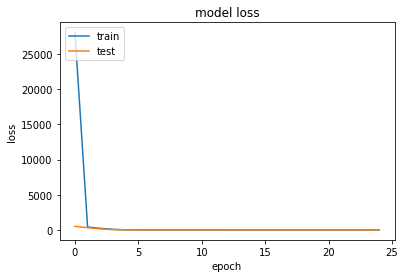

In [62]:
import matplotlib.pyplot as plt
def plot_stats(history_logs):
  # summarize history for loss
  plt.plot(history_logs.history['loss'])
  plt.plot(history_logs.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
plot_stats(history)


In [63]:
model_lr = keras.models.Sequential(name = 'model_lr')
model_lr.add(keras.layers.InputLayer(input_shape=21))
model_lr.add(keras.layers.Dense(1, activation = None))
model_lr.compile(optimizer = keras.optimizers.Adam(lr=0.001), loss = 'mae', metrics = 'mae')
model_lr.summary()

Model: "model_lr"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 22        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [64]:
history_mae = model_lr.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=4096,epochs=25,callbacks=[model_checkpoint, reduce_lr],verbose=1)

Epoch 1/25
1057/1057 [==============================] - 6s 5ms/step - loss: 38.3512 - mae: 38.3512 - val_loss: 5.6819 - val_mae: 5.6819 - lr: 0.0010
Epoch 2/25
1057/1057 [==============================] - 5s 4ms/step - loss: 0.6234 - mae: 0.6234 - val_loss: 0.1507 - val_mae: 0.1507 - lr: 0.0010
Epoch 3/25
1057/1057 [==============================] - 4s 4ms/step - loss: 0.1604 - mae: 0.1604 - val_loss: 0.1842 - val_mae: 0.1842 - lr: 0.0010
Epoch 4/25
1057/1057 [==============================] - 5s 4ms/step - loss: 0.1609 - mae: 0.1609 - val_loss: 0.1536 - val_mae: 0.1536 - lr: 0.0010
Epoch 5/25
1056/1057 [============================>.] - ETA: 0s - loss: 0.1722 - mae: 0.1722
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1057/1057 [==============================] - 4s 4ms/step - loss: 0.1722 - mae: 0.1722 - val_loss: 0.3341 - val_mae: 0.3341 - lr: 0.0010
Epoch 6/25
1057/1057 [==============================] - 4s 4ms/step - loss: 0.0611 - mae: 0.0611 - val_lo

In [65]:
import matplotlib.pyplot as plt
def plot_stats(history_logs):
  # summarize history for loss
  plt.plot(history_logs.history['loss'])
  plt.plot(history_logs.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
plot_stats(history_mae)


### Multi Layer Perceptorn (mse,mae)

In [66]:
#MLP
model_mlp = keras.models.Sequential(name = 'model_mlp')
model_mlp.add(keras.layers.InputLayer(input_shape=21))
model_mlp.add(keras.layers.Dense(5, activation = None))
model_mlp.add(keras.layers.Dense(1, activation = None))
model_mlp.compile(optimizer = keras.optimizers.Adam(lr=0.001), loss = 'mse', metrics = 'mse')
model_mlp.summary()

Model: "model_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 110       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [67]:
history_mlp_mse = model_mlp.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=4096,epochs = 25,callbacks=[model_checkpoint, reduce_lr],verbose=1)

Epoch 1/25
1057/1057 [==============================] - 6s 5ms/step - loss: 4746.7705 - mse: 4746.7705 - val_loss: 159.7965 - val_mse: 159.7965 - lr: 0.0010
Epoch 2/25
1057/1057 [==============================] - 5s 5ms/step - loss: 51.8165 - mse: 51.8165 - val_loss: 9.4007 - val_mse: 9.4007 - lr: 0.0010
Epoch 3/25
1057/1057 [==============================] - 5s 5ms/step - loss: 5.8452 - mse: 5.8452 - val_loss: 4.3954 - val_mse: 4.3954 - lr: 0.0010
Epoch 4/25
1057/1057 [==============================] - 5s 5ms/step - loss: 3.5024 - mse: 3.5024 - val_loss: 2.7028 - val_mse: 2.7028 - lr: 0.0010
Epoch 5/25
1051/1057 [============================>.] - ETA: 0s - loss: 2.0395 - mse: 2.0395
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1057/1057 [==============================] - 5s 5ms/step - loss: 2.0363 - mse: 2.0363 - val_loss: 1.4900 - val_mse: 1.4900 - lr: 0.0010
Epoch 6/25
1057/1057 [==============================] - 5s 5ms/step - loss: 1.2535 - mse: 1.253

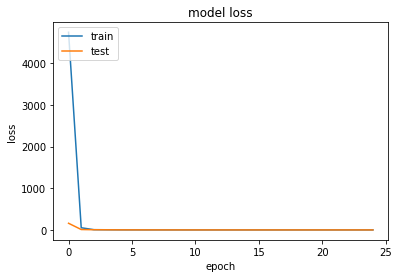

In [68]:
import matplotlib.pyplot as plt
def plot_stats(history_logs):
  # summarize history for loss
  plt.plot(history_logs.history['loss'])
  plt.plot(history_logs.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
plot_stats(history_mlp_mse)


In [69]:
#MLP
model_mlp = keras.models.Sequential(name = 'model_mlp')
model_mlp.add(keras.layers.InputLayer(input_shape=21))
model_mlp.add(keras.layers.Dense(5, activation = None))
model_mlp.add(keras.layers.Dense(1, activation = None))
model_mlp.compile(optimizer = keras.optimizers.Adam(lr=0.001), loss = 'mae', metrics = 'mae')
model_mlp.summary()

Model: "model_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 110       
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [70]:
history_mlp = model_mlp.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=4096,epochs = 25,callbacks=[model_checkpoint, reduce_lr],verbose=1)

Epoch 1/25
1057/1057 [==============================] - 6s 5ms/step - loss: 54.0445 - mae: 54.0445 - val_loss: 0.3820 - val_mae: 0.3820 - lr: 0.0010
Epoch 2/25
1057/1057 [==============================] - 5s 5ms/step - loss: 0.4060 - mae: 0.4060 - val_loss: 0.4890 - val_mae: 0.4890 - lr: 0.0010
Epoch 3/25
1057/1057 [==============================] - 5s 5ms/step - loss: 0.3651 - mae: 0.3651 - val_loss: 0.2460 - val_mae: 0.2460 - lr: 0.0010
Epoch 4/25
1057/1057 [==============================] - 5s 5ms/step - loss: 0.2893 - mae: 0.2893 - val_loss: 0.4000 - val_mae: 0.4000 - lr: 0.0010
Epoch 5/25
1057/1057 [==============================] - 5s 5ms/step - loss: 0.3589 - mae: 0.3589 - val_loss: 0.2891 - val_mae: 0.2891 - lr: 0.0010
Epoch 6/25
1048/1057 [============================>.] - ETA: 0s - loss: 0.3280 - mae: 0.3280
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1057/1057 [==============================] - 5s 5ms/step - loss: 0.3279 - mae: 0.3279 - val_lo

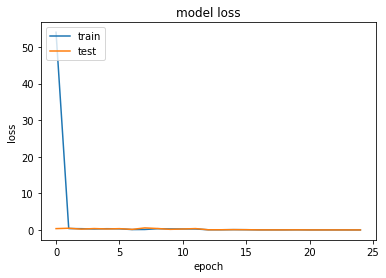

In [71]:
def plot_stats(history_logs):
  # summarize history for loss
  plt.plot(history_logs.history['loss'])
  plt.plot(history_logs.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
plot_stats(history_mlp)

## Deep Neural Network (mse,mae)

In [72]:
#DNN
model_dnn = keras.models.Sequential(name = 'model_dnn')
model_dnn.add(keras.layers.InputLayer(input_shape=21))
model_dnn.add(keras.layers.Dense(5, activation = 'relu'))
model_dnn.add(keras.layers.Dense(5, activation = 'relu'))
model_dnn.add(keras.layers.Dense(1, activation = None))
model_dnn.compile(optimizer = keras.optimizers.Adam(lr=0.001), loss = 'mse', metrics = 'mse')
model_dnn.summary()

Model: "model_dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 110       
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [73]:
history_dnn = model_dnn.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=4096,epochs = 15,callbacks=[model_checkpoint, reduce_lr],verbose=1)

Epoch 1/15
1057/1057 [==============================] - 6s 5ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0219 - val_mse: 0.0219 - lr: 0.0010
Epoch 2/15
1057/1057 [==============================] - 5s 5ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0219 - val_mse: 0.0219 - lr: 0.0010
Epoch 3/15
1057/1057 [==============================] - 5s 5ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0219 - val_mse: 0.0219 - lr: 0.0010
Epoch 4/15
1057/1057 [==============================] - 5s 5ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0219 - val_mse: 0.0219 - lr: 0.0010
Epoch 5/15
1053/1057 [============================>.] - ETA: 0s - loss: 0.0219 - mse: 0.0219
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1057/1057 [==============================] - 5s 5ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0219 - val_mse: 0.0219 - lr: 0.0010
Epoch 6/15
1057/1057 [==============================] - 5s 5ms/step - loss: 0.0219 - mse: 0.0219 - val_loss

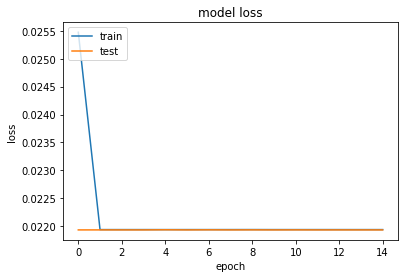

In [74]:
def plot_stats(history_logs):
  # summarize history for loss
  plt.plot(history_logs.history['loss'])
  plt.plot(history_logs.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
plot_stats(history_dnn)

In [75]:
#DNN
model_dnn = keras.models.Sequential(name = 'model_dnn')
model_dnn.add(keras.layers.InputLayer(input_shape=21))
model_dnn.add(keras.layers.Dense(5, activation = 'relu'))
model_dnn.add(keras.layers.Dense(5, activation = 'relu'))
model_dnn.add(keras.layers.Dense(1, activation = None))
model_dnn.compile(optimizer = keras.optimizers.Adam(lr=0.001), loss = 'mae', metrics = 'mae')
model_dnn.summary()

Model: "model_dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 110       
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [76]:
history_dnn_mae = model_dnn.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=4096,epochs = 15,callbacks=[model_checkpoint, reduce_lr],verbose=1)

Epoch 1/15
1057/1057 [==============================] - 6s 5ms/step - loss: 9.6124 - mae: 9.6124 - val_loss: 0.1137 - val_mae: 0.1137 - lr: 0.0010
Epoch 2/15
1057/1057 [==============================] - 5s 5ms/step - loss: 0.1089 - mae: 0.1089 - val_loss: 0.1070 - val_mae: 0.1070 - lr: 0.0010
Epoch 3/15
1057/1057 [==============================] - 5s 5ms/step - loss: 0.1064 - mae: 0.1064 - val_loss: 0.1061 - val_mae: 0.1061 - lr: 0.0010
Epoch 4/15
1057/1057 [==============================] - 5s 5ms/step - loss: 0.1060 - mae: 0.1060 - val_loss: 0.1059 - val_mae: 0.1059 - lr: 0.0010
Epoch 5/15
1050/1057 [============================>.] - ETA: 0s - loss: 0.1059 - mae: 0.1059
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1057/1057 [==============================] - 5s 5ms/step - loss: 0.1059 - mae: 0.1059 - val_loss: 0.1059 - val_mae: 0.1059 - lr: 0.0010
Epoch 6/15
1057/1057 [==============================] - 5s 5ms/step - loss: 0.1059 - mae: 0.1059 - val_loss

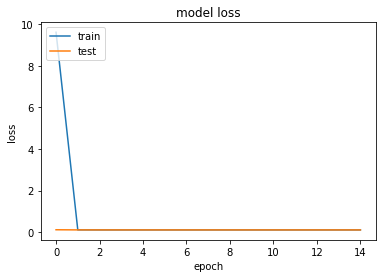

In [77]:
def plot_stats(history_logs):
  # summarize history for loss
  plt.plot(history_logs.history['loss'])
  plt.plot(history_logs.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
plot_stats(history_dnn_mae)

### DNN with (batch size = 32) and (epochs = 25)

In [ ]:
history_dnn1 = model_dnn.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs = 15,callbacks=[model_checkpoint, reduce_lr],verbose=1)

Epoch 1/15
 68821/135226 [==============>...............] - ETA: 4:06 - loss: 0.0607 - mae: 0.0607

In [ ]:
def plot_stats(history_logs):
  # summarize history for loss
  plt.plot(history_logs.history['loss'])
  plt.plot(history_logs.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
plot_stats(history_dnn1)